In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
!git config --global user.name "ehsaanisme"
!git config --global user.email "ehsaanismail@gmail.com"

In [24]:
!git clone https://github.com/ehsaanisme/ECS-171.git

Cloning into 'ECS-171'...


# Homework 2
In this assignment, we will be exploring the car dataset and analyzing their fuel efficiency again. <br >
Specifically, this time we will do more data understanding and build one Logistic Regression model. <br >
**The given dataset is already modified and cleaned**, but you can find [the original information here.](https://archive.ics.uci.edu/ml/datasets/auto+mpg).

### Dataset Attribute Information

1. **mpg**: Miles per gallon. This is one primary measurement for car fuel efficiency.
2. **displacement** : The cylinder volumes in cubic inches.
3. **horsepower** : Engine power.
4. **weight** : In pounds.
5. **acceleration** : The elapsed time in seconds to go from 0 to 60mph.
6. **origin** : Region of origin.

Moving to the second part of this assignment we want to get deeper into polinomial regression, where we want use the dataset 'cost.csv' to analysis tthe relationship between production output and cost.


#### Libraries that could possiblly be used: numpy, scipy, pandas, scikit-learn, matplotlib, operator

#### Other Notes
 - Don't worry about not being able to achieve high accuracy, it is neither the goal nor the grading standard of **this** assignment. <br >
 - If not specified, you are not required to do hyperparameter tuning, but feel free to do so if you'd like.
 - Discussion materials should be helpful for doing the assignments.

## Exercise 1 : Data Understanding (20 points in total)
Recall the dataset 'auto-mpg.csv' from last week homework, we are goint to use it again for Exercise 1 and 2 again.
* As the classes(``origin``) are categorical, use one-hot encoding to represent the set of classes.
* Normalize each field of the input data using the min-max normalization technique.
* Plot the distribution of data and analyze the distribution. Explain if the data is symmetric, or sekewed to right or left.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('auto-mpg.csv')

print(df.head())

    mpg  displacement  horsepower  weight  acceleration origin
0  18.0         307.0       130.0  3504.0          12.0    USA
1  15.0         350.0       165.0  3693.0          11.5    USA
2  18.0         318.0       150.0  3436.0          11.0    USA
3  16.0         304.0       150.0  3433.0          12.0    USA
4  17.0         302.0       140.0  3449.0          10.5    USA


In [3]:
df = pd.get_dummies(df, columns=['origin'], prefix='origin')

print(df.head())

    mpg  displacement  horsepower  weight  acceleration  origin_Europe  \
0  18.0         307.0       130.0  3504.0          12.0          False   
1  15.0         350.0       165.0  3693.0          11.5          False   
2  18.0         318.0       150.0  3436.0          11.0          False   
3  16.0         304.0       150.0  3433.0          12.0          False   
4  17.0         302.0       140.0  3449.0          10.5          False   

   origin_Japan  origin_USA  
0         False        True  
1         False        True  
2         False        True  
3         False        True  
4         False        True  


In [4]:
scaler = MinMaxScaler()

numerical_columns = ['displacement', 'horsepower', 'weight', 'acceleration']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print(df.head())

    mpg  displacement  horsepower    weight  acceleration  origin_Europe  \
0  18.0      0.617571    0.456522  0.536150      0.238095          False   
1  15.0      0.728682    0.646739  0.589736      0.208333          False   
2  18.0      0.645995    0.565217  0.516870      0.178571          False   
3  16.0      0.609819    0.565217  0.516019      0.238095          False   
4  17.0      0.604651    0.510870  0.520556      0.148810          False   

   origin_Japan  origin_USA  
0         False        True  
1         False        True  
2         False        True  
3         False        True  
4         False        True  


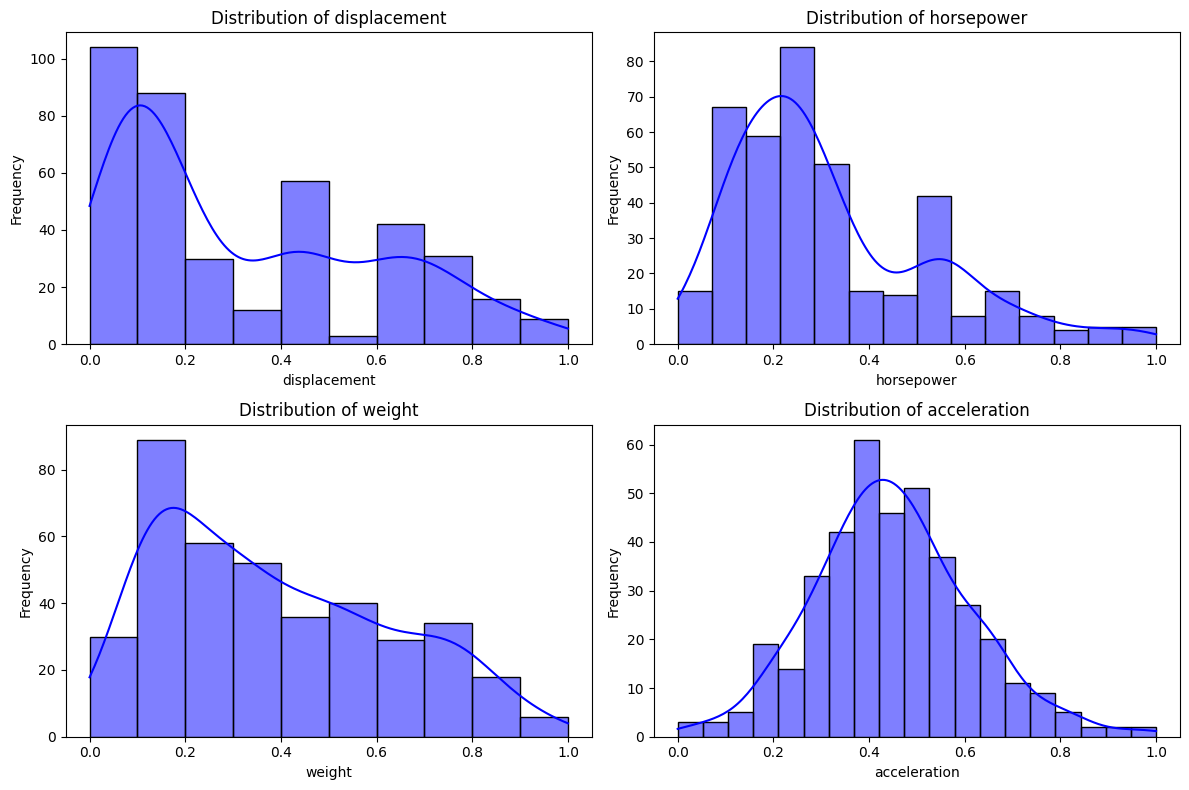

In [5]:
plt.figure(figsize=(12, 8))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], kde=True, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

displacement, weight, and horsepower are all right-skewed. This indicates that most cars in the dataset have lower values for these attributes, with fewer cars having very high values; there are fewer cars with very high displacement values, fewer heavy cars in the dataset, fewer high-performance cars in the dataset.

acceleration is symmetric, indicating that the acceleration times are evenly distributed across the dataset.

## Exercise 2 - Logistic Regression (20 points in total)
Now we are going to build a classification model on ``origin`` using all the other 5 attributes. <br >
Note that Logistic Regression is a binary classificaiton algorithm.

### Exercise 2.1 - Processing and Splitting the Dataset (5 points)
In this exercise 1, we only consider those observations where they originate from either "USA" or "Japan". <br >
So please **remove** those observations that originate from "Europe". <br >
And then, split the data into training and testing set with the ratio of 80:20. <br >

In [6]:
df_filtered = df[(df['origin_USA'] == 1) | (df['origin_Japan'] == 1)]
df_filtered = df_filtered.drop(columns=['origin_Europe'])

print(df_filtered.head())

    mpg  displacement  horsepower    weight  acceleration  origin_Japan  \
0  18.0      0.617571    0.456522  0.536150      0.238095         False   
1  15.0      0.728682    0.646739  0.589736      0.208333         False   
2  18.0      0.645995    0.565217  0.516870      0.178571         False   
3  16.0      0.609819    0.565217  0.516019      0.238095         False   
4  17.0      0.604651    0.510870  0.520556      0.148810         False   

   origin_USA  
0        True  
1        True  
2        True  
3        True  
4        True  


In [8]:
from sklearn.model_selection import train_test_split

X = df_filtered[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']]
y = df_filtered['origin_Japan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

Training set: (259, 5), (259,)
Testing set: (65, 5), (65,)


### Exercise 2.2 - Logistic Regression (15 points)

Using all the other 5 attributes, please build a Logistic Regression model that distinguishes between cars from Japan and cars from the USA. <br >
Then, **if we are distinguishing between Japan and Europe this time, how do you think the model performance(in terms of accuracy) will change? Provide your reasoning.** (Hint: Exercise 1)

Requirements
 - Report the testing precision and recall for both regions.

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score

model = LogisticRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [10]:
precision_japan = precision_score(y_test, y_pred, pos_label=1)
recall_japan = recall_score(y_test, y_pred, pos_label=1)

precision_usa = precision_score(y_test, y_pred, pos_label=0)
recall_usa = recall_score(y_test, y_pred, pos_label=0)

accuracy = accuracy_score(y_test, y_pred)

print(f"Precision for Japan: {precision_japan:.2f}")
print(f"Recall for Japan: {recall_japan:.2f}")
print(f"Precision for USA: {precision_usa:.2f}")
print(f"Recall for USA: {recall_usa:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Precision for Japan: 0.78
Recall for Japan: 0.74
Precision for USA: 0.89
Recall for USA: 0.91
Accuracy: 0.86


In Exercise 1, we observed that the distributions of features like displacement, weight, and horsepower are right-skewed. If the distribution of these features for European cars is significantly different from Japanese cars, the model might perform better or worse depending on the overlap between the two classes. Also, if the number of European cars is significantly different from the number of Japanese cars, it could lead to class imbalance, affecting the model's ability to generalize.

Lastly, if European and Japanese cars have similar characteristics, the model might struggle to distinguish between them, leading to lower accuracy.

## Exercise 3 - Polynomial Regressor using Gradient Descent (25 points in total)
Now we are going to look into model fitting. In the dataset 'cost.csv', the first column is the independent variable production_output, and the second column is the dependent variable cost.

### Exercise 3.1 - Split the dataset (5 points)
Import the dataset 'cost.csv' and split them into training and testing set with ratio 70:30.

In [11]:
df_cost = pd.read_csv('cost.csv')

print(df_cost.head())

   production_output       cost
0           0.588758  -4.301000
1           1.679874  89.065547
2           1.217010  11.554992
3           0.207285  -8.976411
4           0.505954  -4.851820


In [12]:
from sklearn.model_selection import train_test_split

X = df_cost[['production_output']]
y = df_cost['cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

Training set: (105, 1), (105,)
Testing set: (45, 1), (45,)


### Exercise 3.2 - Polynomial Regression (20 points)
Compute the RMSE and R2 for the training and testing set. Using polynomial regression with degree 1, 2, 3, and 4, which model provides the most appropriate prediction? Justify your answer and plot the fitted line for each model.

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def fit_polynomial_regression(X_train, y_train, X_test, y_test, degree): #helper function
    # getting polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # fit model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # get predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # calculate RMSE and R²
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)

    return model, rmse_train, r2_train, rmse_test, r2_test, X_train_poly, y_train_pred

In [16]:
degrees = [1, 2, 3, 4]
results = {}

#iterate through and put into the function
for degree in degrees:
    model, rmse_train, r2_train, rmse_test, r2_test, X_train_poly, y_train_pred = fit_polynomial_regression(
        X_train, y_train, X_test, y_test, degree
    )
    # mapping to correct
    results[degree] = {
        'model': model,
        'rmse_train': rmse_train,
        'r2_train': r2_train,
        'rmse_test': rmse_test,
        'r2_test': r2_test,
        'X_train_poly': X_train_poly,
        'y_train_pred': y_train_pred
    }
    print(f"Degree {degree}:")
    print(f"  Training RMSE: {rmse_train:.2f}, R²: {r2_train:.2f}")
    print(f"  Testing RMSE: {rmse_test:.2f}, R²: {r2_test:.2f}")

Degree 1:
  Training RMSE: 436.79, R²: 0.56
  Testing RMSE: 280.11, R²: 0.76
Degree 2:
  Training RMSE: 180.07, R²: 0.93
  Testing RMSE: 129.46, R²: 0.95
Degree 3:
  Training RMSE: 37.13, R²: 1.00
  Testing RMSE: 35.73, R²: 1.00
Degree 4:
  Training RMSE: 5.98, R²: 1.00
  Testing RMSE: 5.98, R²: 1.00


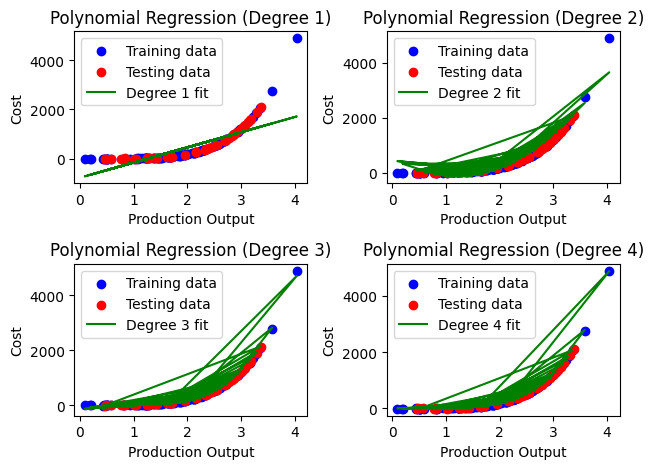

In [17]:
for i, degree in enumerate(degrees, 1):
    plt.subplot(2, 2, i)
    plt.scatter(X_train, y_train, color='blue', label='Training data')
    plt.scatter(X_test, y_test, color='red', label='Testing data')
    plt.plot(X_train, results[degree]['y_train_pred'], color='green', label=f'Degree {degree} fit')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.xlabel('Production Output')
    plt.ylabel('Cost')
    plt.legend()

plt.tight_layout()
plt.show()

The trade-off between model complexity and overfitting is a critical consideration in polynomial regression. While the Degree 4 model achieves the best performance with the lowest RMSE (5.98) and highest R² (1.00) on both training and testing sets, it carries a risk of overfitting. Overfitting occurs when a model becomes too complex, capturing noise or random fluctuations in the training data rather than the underlying pattern. This can lead to poor generalization on unseen data. In contrast, simpler models like Degree 2 (Quadratic) and Degree 3 (Cubic) offer a better balance. The Degree 2 model, with an RMSE of 129.46 and R² of 0.95 on the testing set, is less complex and generalizes well, while the Degree 3 model, with an RMSE of 35.73 and R² of 1.00, provides a near-perfect fit without excessive complexity. Simpler models are also easier to interpret and computationally efficient. Therefore, while the Degree 4 model fits the data exceptionally well, the Degree 3 model is likely the best choice for this dataset, as it balances performance and generalization, minimizing the risk of overfitting.

## Exercise 4 : Log Likelihood (35 points in total)
For a model with two independent variables x1 (Weight) and x2 (Length), compute the log-likelihood for the model: ŷ = 0.1 x1 + 0.1 x2 , where the dependent variable ŷ represents the prediction for Height. Given the dataset below (in the table), assuming that the measurements have normal distribution, please complete the table by calculating the Predicted hight, squared residual and log-likelihood for each data point. Then, compute and report the log-likelihood for the entire dataset.

Round your answer to 4 d.p. For simplicity, use and log base 10.

Hint: $f(y_i)=\frac{1}{\sqrt{2\piσ^2}}e^{\frac{-(y_i-ŷ_i)^2}{2σ^2}}$

Model M1:
Weight x1 | Length x2 | Actual Height y | Predicted Height ŷ | squared residual (y - ŷ )^2 | Log-Likelihood
---|---|---|---|---|---|
7.0 | 50 | 5.80
6.0 | 55 | 5.70
8.0 | 56 | 6.00

In [18]:
import numpy as np

data = [
    {'x1': 7.0, 'x2': 50, 'y': 5.80},
    {'x1': 6.0, 'x2': 55, 'y': 5.70},
    {'x1': 8.0, 'x2': 56, 'y': 6.00}
]

beta1 = 0.1
beta2 = 0.1

sigma = 1

# helper function
def log_likelihood(y, y_pred, sigma):
    # log of the normal distribution PDF (base 10)
    log_pdf = np.log10(1 / np.sqrt(2 * np.pi * sigma**2)) - ((y - y_pred)**2 / (2 * sigma**2)) * np.log10(np.e)
    return log_pdf

total_log_likelihood = 0

# go through all rows
for row in data:
    x1 = row['x1']
    x2 = row['x2']
    y = row['y']

    # find predicted height
    y_pred = beta1 * x1 + beta2 * x2

    # squared residual
    squared_residual = (y - y_pred)**2

    # log-likelihood for this data point
    log_likelihood_value = log_likelihood(y, y_pred, sigma)

    # add to total log-likelihood
    total_log_likelihood += log_likelihood_value

    print(f"Weight (x1): {x1}, Length (x2): {x2}, Actual Height (y): {y}")
    print(f"Predicted Height (ŷ): {y_pred:.4f}")
    print(f"Squared Residual: {squared_residual:.4f}")
    print(f"Log-Likelihood: {log_likelihood_value:.4f}")
    print("-----------------------------")

print(f"Total Log-Likelihood for the Dataset: {total_log_likelihood:.4f}")

Weight (x1): 7.0, Length (x2): 50, Actual Height (y): 5.8
Predicted Height (ŷ): 5.7000
Squared Residual: 0.0100
Log-Likelihood: -0.4013
-----------------------------
Weight (x1): 6.0, Length (x2): 55, Actual Height (y): 5.7
Predicted Height (ŷ): 6.1000
Squared Residual: 0.1600
Log-Likelihood: -0.4338
-----------------------------
Weight (x1): 8.0, Length (x2): 56, Actual Height (y): 6.0
Predicted Height (ŷ): 6.4000
Squared Residual: 0.1600
Log-Likelihood: -0.4338
-----------------------------
Total Log-Likelihood for the Dataset: -1.2689


The measurements are assumed to follow a normal distribution, and for simplicity, the variance $σ^2$ is set to 1.